# Advent of Code 2021: Day 2

In [1]:
#input = "ExampleInput.txt"
input = "SolutionInput.txt"

"SolutionInput.txt"

## Part 1

In [2]:
using Base.Iterators
using Underscores
using Match

run_ln(pc, ln) = begin
  act, rchg = split(ln)
  chg = parse(Int, rchg)

  @match act begin
    "forward" => pc .+ [chg, 0]
    "up"      => pc .- [0, chg]
    "down"    => pc .+ [0, chg]
  end
end

@_ eachline(input)                               |>
   accumulate(run_ln(_1, _2), __; init = [0, 0]) |>
   last                                          |>
   reduce(*, __)

1507611

## Part 2

In [3]:
using Base.Iterators
using Underscores
using Match

run_ln2(pc, ln) = begin
  vec, aim = pc
  act, rchg = split(ln)
  chg = parse(Int, rchg)

  @match act begin
    "forward" => (vec .+ [chg, aim * chg], aim)
    "up"      => (vec, aim - chg)
    "down"    => (vec, aim + chg)
  end
end

@_ eachline(input)                                     |>
   accumulate(run_ln2(_1, _2), __; init = ([0, 0], 0)) |>
   last                                                |>
   first                                               |>
   reduce(*, __)

1880593125

## Interesting Visualisations

### Part 1

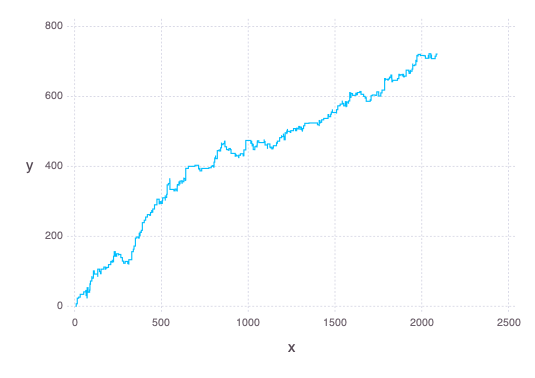

false

In [4]:
import Cairo, Fontconfig

using Gadfly

P = @_ eachline(input)                               |>
       accumulate(run_ln(_1, _2), __; init = [0, 0]) |>
       collect

draw(PNG(), plot(x=map(first, P), y=map(last, P), Geom.line))


### Part 2

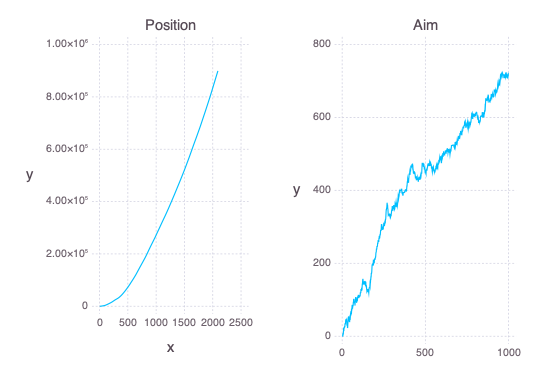

false

In [7]:
import Cairo, Fontconfig

using Gadfly

P1 = @_ eachline(input)                                     |>
        accumulate(run_ln2(_1, _2), __; init = ([0, 0], 0))

Pc = @_ P1             |>
        map(first, __) |>
        collect

Pa = @_ P1            |>
        map(last, __) |>
        collect  

draw(PNG(), 
     hstack(plot(x=map(first, Pc), y=map(last, Pc), Geom.line, Guide.title("Position")),
            plot(y=Pa, Geom.line, Guide.title("Aim"))))